In [1]:
import richdem as rd
import numpy as np

In [3]:
#dem = rd.LoadGDAL('zero_p_test/070300051102-3DEP.tif')
dem = rd.LoadGDAL('/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/chelsa_v2/envicloud/chelsa/chelsa_V2/GLOBAL/climatologies/1981-2010/bio/CHELSA_bio2_1981-2010_V.2.1.tif')

rdarray([[23, 23, 23, ..., 23, 23, 23],
         [23, 23, 23, ..., 23, 23, 23],
         [23, 23, 23, ..., 23, 23, 23],
         ...,
         [31, 31, 31, ..., 31, 31, 31],
         [31, 31, 31, ..., 31, 31, 31],
         [32, 32, 31, ..., 31, 32, 32]], dtype=uint16)


A Slope calculation (rise/run)
C Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918

W Cell X and Y dimensions are not equal!
t Wall-time = 0.00733555===================== ] (99% - 0.0s - 1 threads)


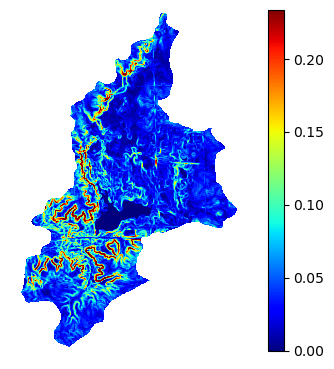

{'vmin': 0.0, 'vmax': 0.2335816434025763}

In [4]:
slope = rd.TerrainAttribute(dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='jet')

In [9]:
dem.geotransform

(265976.771132624,
 9.022362591774954,
 0.0,
 2454073.540050484,
 0.0,
 -9.02236259177512)

(array([6.6914e+04, 7.9578e+04, 7.7164e+04, 6.3805e+04, 4.6550e+04,
        3.1908e+04, 2.2630e+04, 1.6621e+04, 1.2804e+04, 9.9080e+03,
        7.7880e+03, 6.2750e+03, 5.1220e+03, 4.1790e+03, 3.4910e+03,
        3.0110e+03, 2.7280e+03, 2.2260e+03, 1.9550e+03, 1.7010e+03,
        1.5200e+03, 1.3200e+03, 1.0980e+03, 1.0420e+03, 8.5500e+02,
        6.9500e+02, 6.2900e+02, 5.7200e+02, 4.9400e+02, 4.1900e+02,
        3.2600e+02, 2.7400e+02, 2.0400e+02, 1.6300e+02, 1.3700e+02,
        1.0400e+02, 1.0500e+02, 5.9000e+01, 4.8000e+01, 3.4000e+01,
        3.2000e+01, 2.9000e+01, 1.9000e+01, 1.5000e+01, 5.0000e+00,
        6.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([0.        , 0.01143617, 0.02287233, 0.0343085 , 0.04574466,
        0.05718083, 0.06861699, 0.08005316, 0.09148932, 0.10292549,
        0.11436166, 0.12579782, 0.13723399, 0.14867015, 0.16010632,
        0.17154248, 0.18297864, 0.19441481, 0.20585097, 0.21728715,
        0.22872332, 0.24015948, 0.25159565, 0.

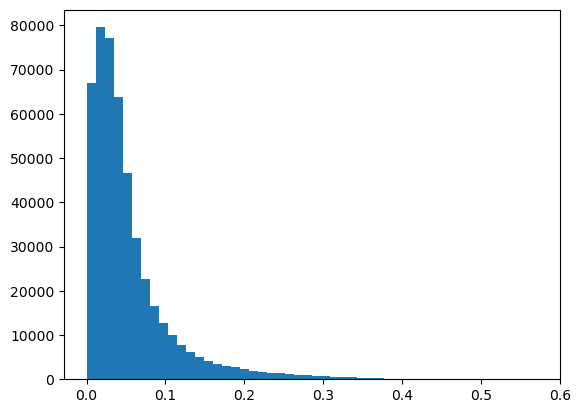

In [13]:
import matplotlib.pyplot as plt
plt.hist(slope.ravel(), 50)

In [20]:
np.mean(slope[~np.isnan(slope)])

rdarray(0.05292057, dtype=float32)

In [21]:
np.median(slope[~np.isnan(slope)])

rdarray(0.0366653, dtype=float32)

In [22]:
slope.mean()

rdarray(nan, dtype=float32)

In [24]:
np.ravel(slope[~np.isnan(slope)])

rdarray([0.04450893, 0.0520845 , 0.03829568, ..., 0.02631355, 0.03676645,
         0.04416729], dtype=float32)

In [27]:
slope.no_data

-9999.0

In [28]:
slope.metadata

{'AREA_OR_POINT': 'Area',
 'units': 'meters',
 'vertical_datum': 'NAVD88',
 'vertical_resolution': '0.001',
 'PROCESSING_HISTORY': '\n2024-06-05 21:32:41.283602 UTC | RichDEM (Python 2.3.0) (hash="e6e735b", hashdate="2022-11-16 20:59:53 -0500") | LoadGDAL(filename=zero_p_test/070300051102-3DEP.tif, no_data=nan)\n2024-06-05 21:33:55.043377 UTC | RichDEM (Python 2.3.0) (hash="e6e735b", hashdate="2022-11-16 20:59:53 -0500") | TerrainAttribute(dem, attrib=slope_riserun, zscale=1.0)'}

In [23]:
import rasterio as rio
dem_src = rio.open('zero_p_test/070300051102-3DEP.tif')

In [29]:
dem_src.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': nan,
 'width': 888,
 'height': 1300,
 'count': 1,
 'crs': CRS.from_epsg(5070),
 'transform': Affine(9.022362591774954, 0.0, 265976.771132624,
        0.0, -9.02236259177512, 2454073.540050484)}

In [16]:
elev = dem_src.read(1)
elev.shape

(1300, 888)

In [24]:
dem_src.crs

CRS.from_epsg(5070)

In [14]:
import matplotlib.pyplot as plt

In [25]:
import geopandas as gpd
carbs_only = gpd.read_file('zero_p_test/070300051102-carbs_only_huc.shp')
carbs_only.crs

<Derived Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [26]:
import rasterio.mask as mask
out_image, out_transform = mask.mask(dem_src, [carbs_only.geometry], crop=True)

ValueError: Input shapes do not overlap raster.

<AxesSubplot: >

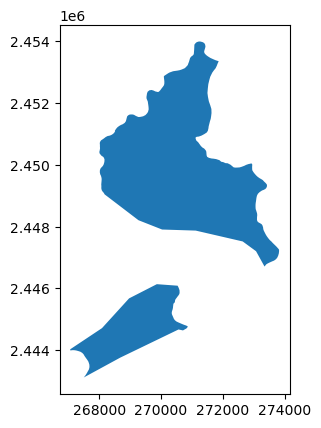

In [28]:
carbs_only.plot()